In [1]:
%matplotlib inline

# Packages
import os, glob, scipy, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Project directory
base_dir = os.path.realpath('..')
print(base_dir)

# Project-specific functions
funDir = os.path.join(base_dir,'Code/Functions')
print(funDir)
sys.path.append(funDir)
import choiceModels, costFunctions, penalizedModelFit, simulateModel

# General-use python functions
dbPath = '/'.join(base_dir.split('/')[0:4])
sys.path.append('%s/Python'%dbPath)
import FigureTools

/Users/jeroen/Dropbox (Brown)/PhD/0. Working folder/HMTG_followUp_final/ShareDataCode
/Users/jeroen/Dropbox (Brown)/PhD/0. Working folder/HMTG_followUp_final/ShareDataCode/Code/Functions


## Load data

In [2]:
# Load data
clusts_all = pd.DataFrame()
sets = [[1,4],[1,6],[2,0]]
model = 'MP_ppSOE'
precision = 100
for study, baseMult in sets:
    if study == 1:
        params = pd.read_csv(os.path.join(base_dir,'Data/Study1/ComputationalModel',
               'ParamsClusters_study-%i_baseMult-%i_model-%s_precision-%i.csv'%(study,baseMult,model, precision)),index_col=0)
#         thetaPhiPivot = pd.read_csv(os.path.join(base_dir,'Results/2.ComputationalModeling/Clustering',
#                                             'Study-%i_baseMult-%i_clusterMap.csv'%(study,baseMult)),index_col=0)
        params['set'] = 'Study 1, x%i-x%i-x%i'%(baseMult-2, baseMult, baseMult+2)
    elif study == 2:
        params = pd.read_csv(os.path.join(base_dir,'Data/Study2/ComputationalModel',
               'ParamsClusters_study-%i_model-%s_precision-%i.csv'%(study,model, precision)),index_col=0)
#         thetaPhiPivot = pd.read_csv(os.path.join(base_dir,'Results/2.ComputationalModeling/Clustering',
#                                             'Study-%i_clusterMap.csv'%(study)),index_col=0)
        params['set'] = 'Study 2'
#     params['study'] = study
#     params['baseMult'] = baseMult
    clusts_all = clusts_all.append(params[['set','sub','theta','phi','ClustName']])
display(clusts_all.head())
display(clusts_all.tail())
clustList = sorted(clusts_all['ClustName'].unique())

set  sub     theta       phi ClustName
0  Study 1, x2-x4-x6    1  0.081617 -0.001948        MO
1  Study 1, x2-x4-x6    2  0.497320  0.081674        GR
2  Study 1, x2-x4-x6    3  0.054459  0.002582        MO
3  Study 1, x2-x4-x6    4  0.101683  0.037533        IA
4  Study 1, x2-x4-x6    5  0.024787  0.048618        IA

set  sub     theta       phi ClustName
50  Study 2  204  0.108283  0.063295        IA
51  Study 2  205  0.117289 -0.004185        MO
52  Study 2  206  0.083070  0.005188        MO
53  Study 2  207  0.266865 -0.091753        MO
54  Study 2  208  0.311664 -0.092520        MO

In [3]:
def plot_sub_ax(subDat,subNum,theta,phi,ax,plotLines=True):
    markers = ['^','o','v']
    handles = list()
    mults = np.sort(subDat['Multiplier'].unique())[::-1]
    for multInd,mult in enumerate(mults):
        x_dat = subDat.loc[subDat['Multiplier']==mult,'Investment']
        y_dat = subDat.loc[subDat['Multiplier']==mult,'Returned']
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6)
        handles.append(handle)
        if plotLines:
            lm = scipy.stats.linregress(x_dat,y_dat)
            ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    ax.set_ylim([-1,41])
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,41,5))
    ax.legend(handles,['x%i'%mults[0],'x%i'%mults[1],'x%i'%mults[2]],loc=2,frameon=False)
    ax.set_xlabel('Investment')
    ax.set_ylabel('Returned')
    ax.set_title('sub-%03d (%.2f, %.2f)'%(subNum, theta, phi))

## Plot study 1 x2-x4-x6

In [4]:
dat1 = pd.read_csv(os.path.join(base_dir,'Data/Study1/HMTG/allDataLong.csv'),header=None)
dat1.columns = ['sub','run','trial','inv','baseMult','mult','exp','ret']

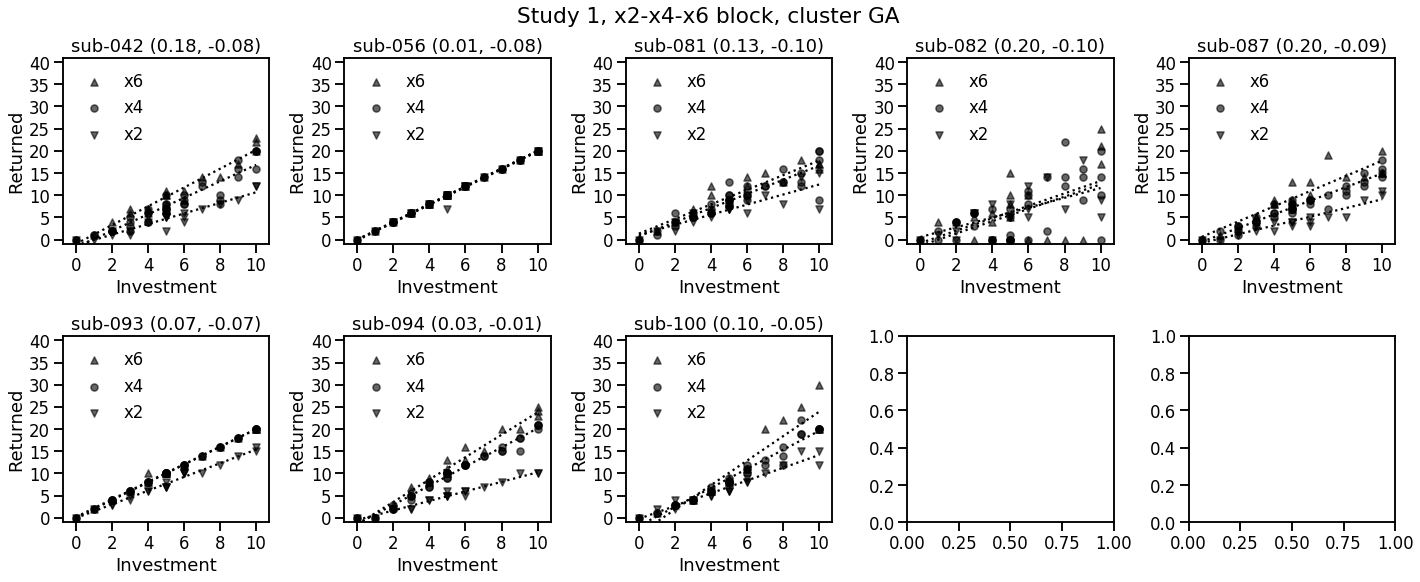

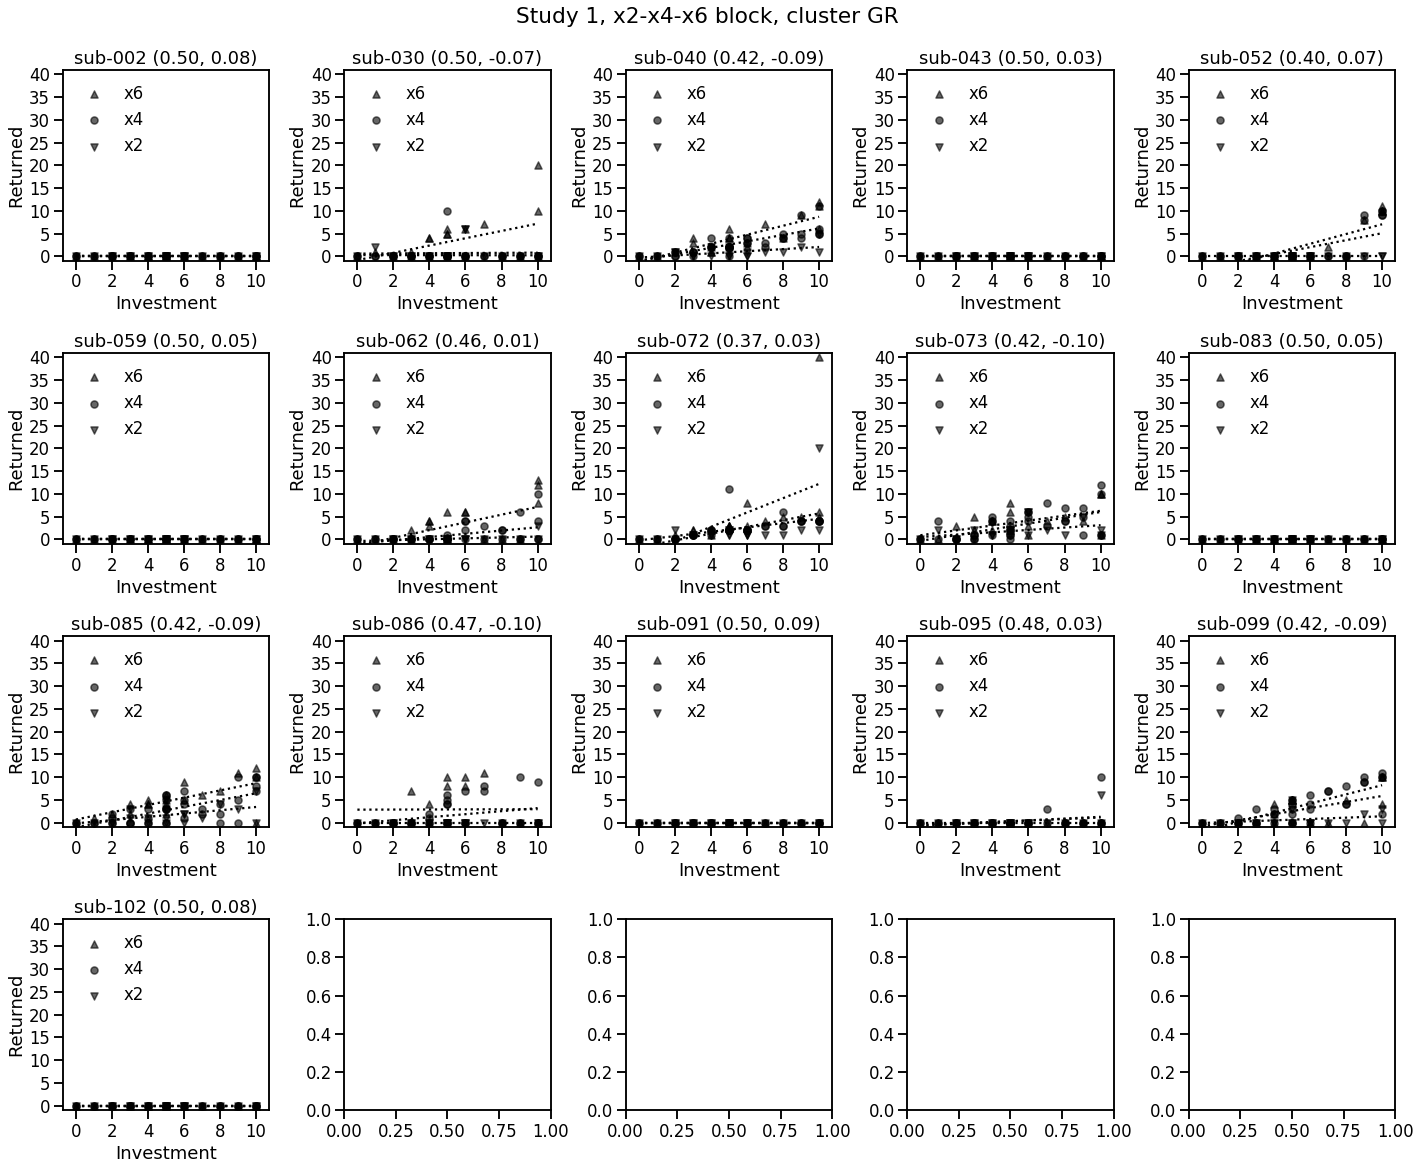

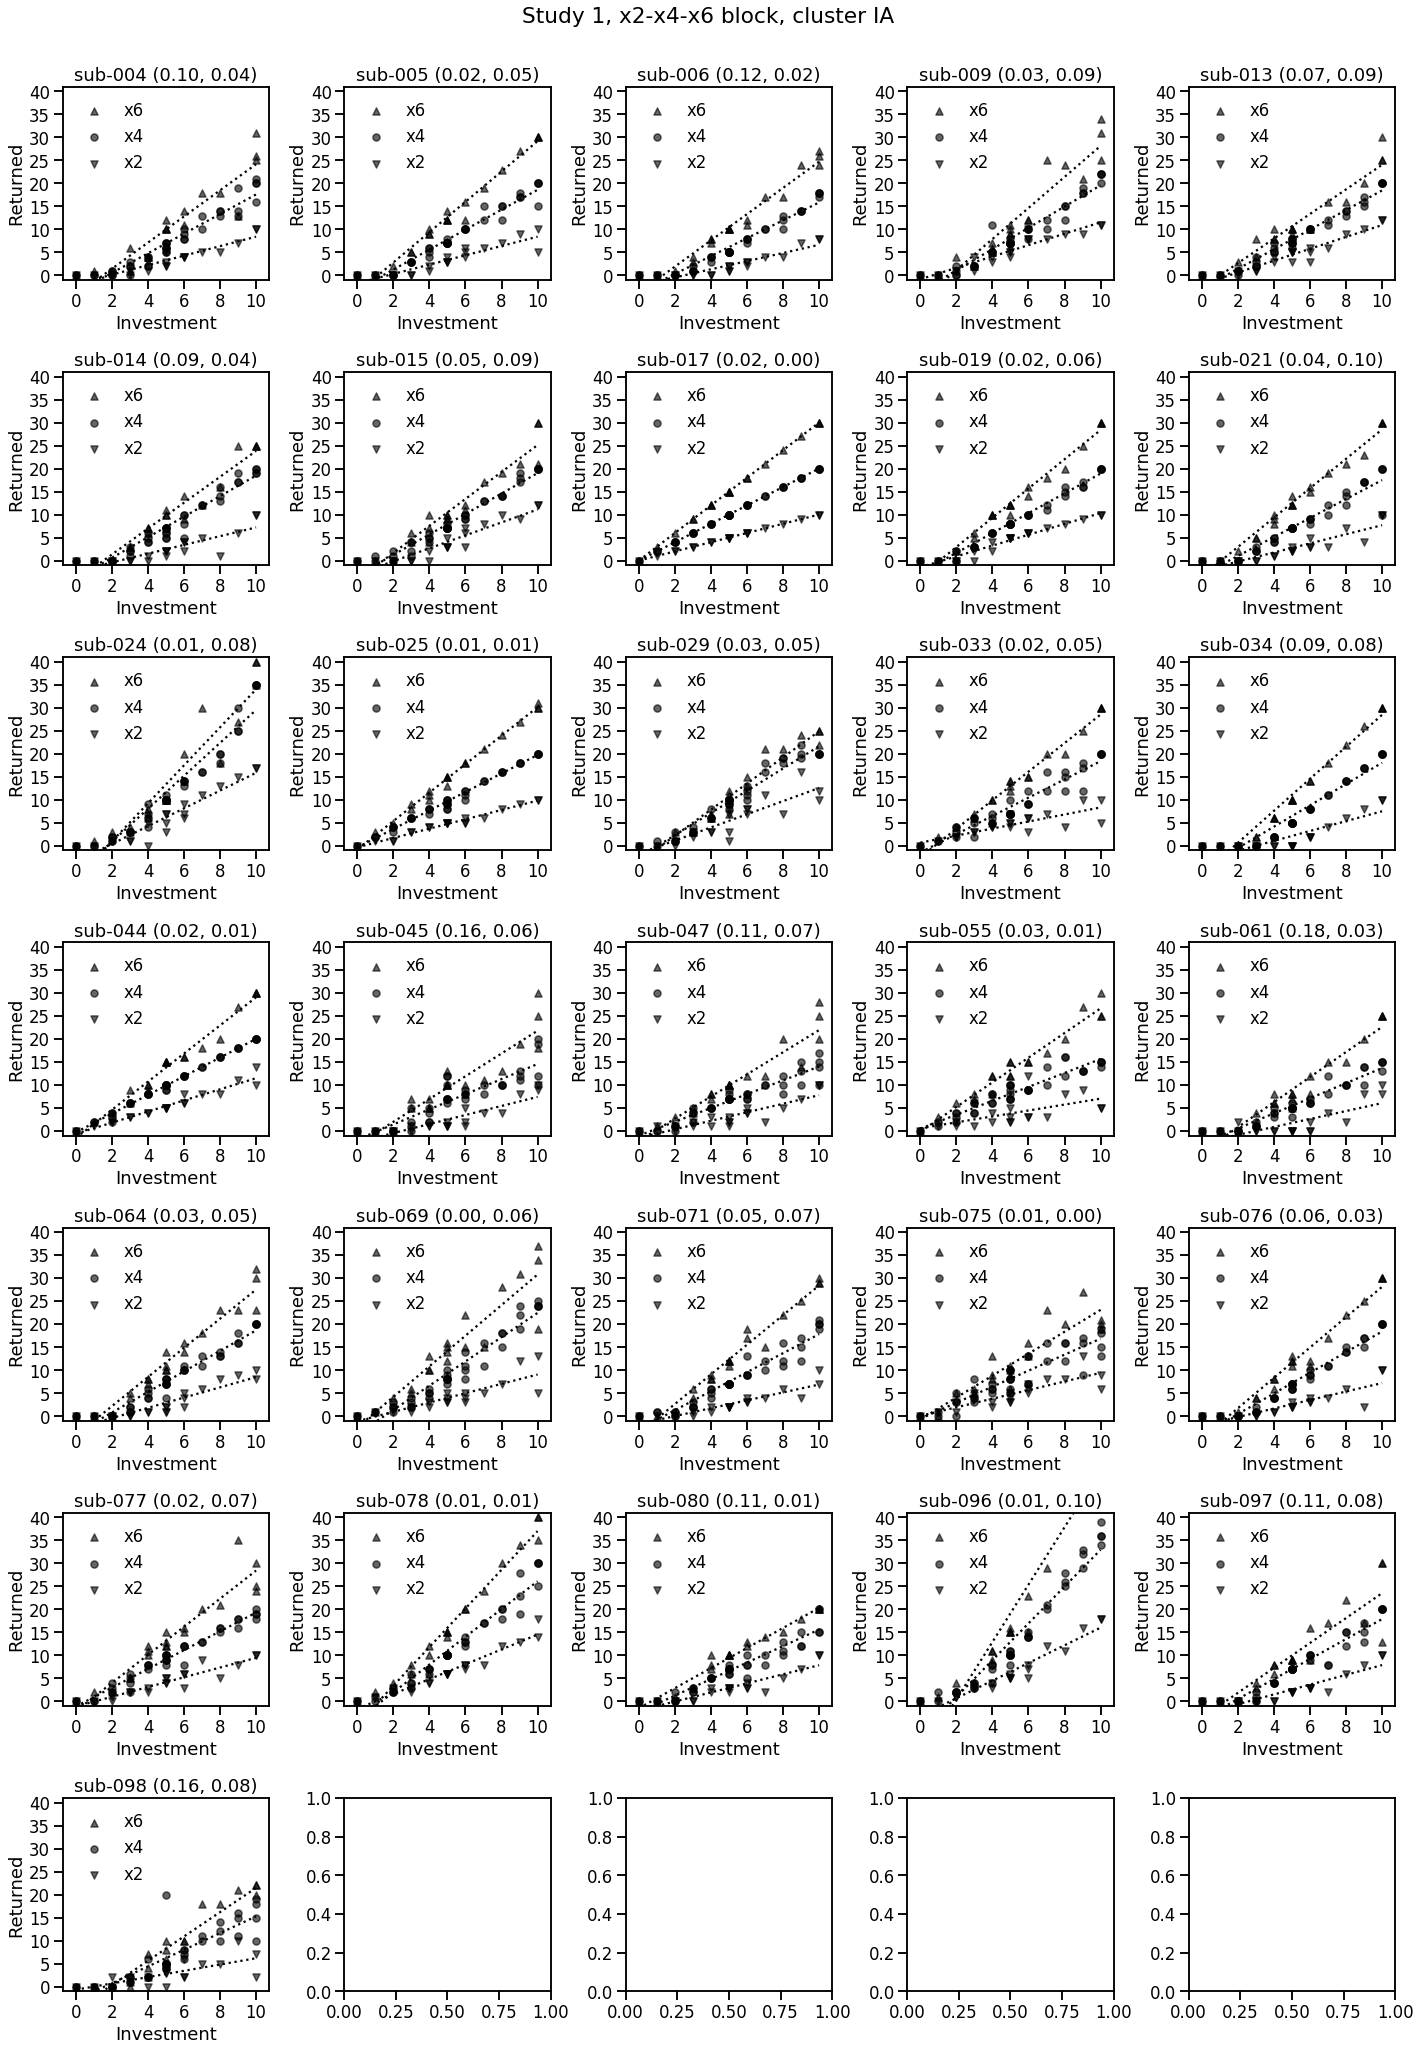

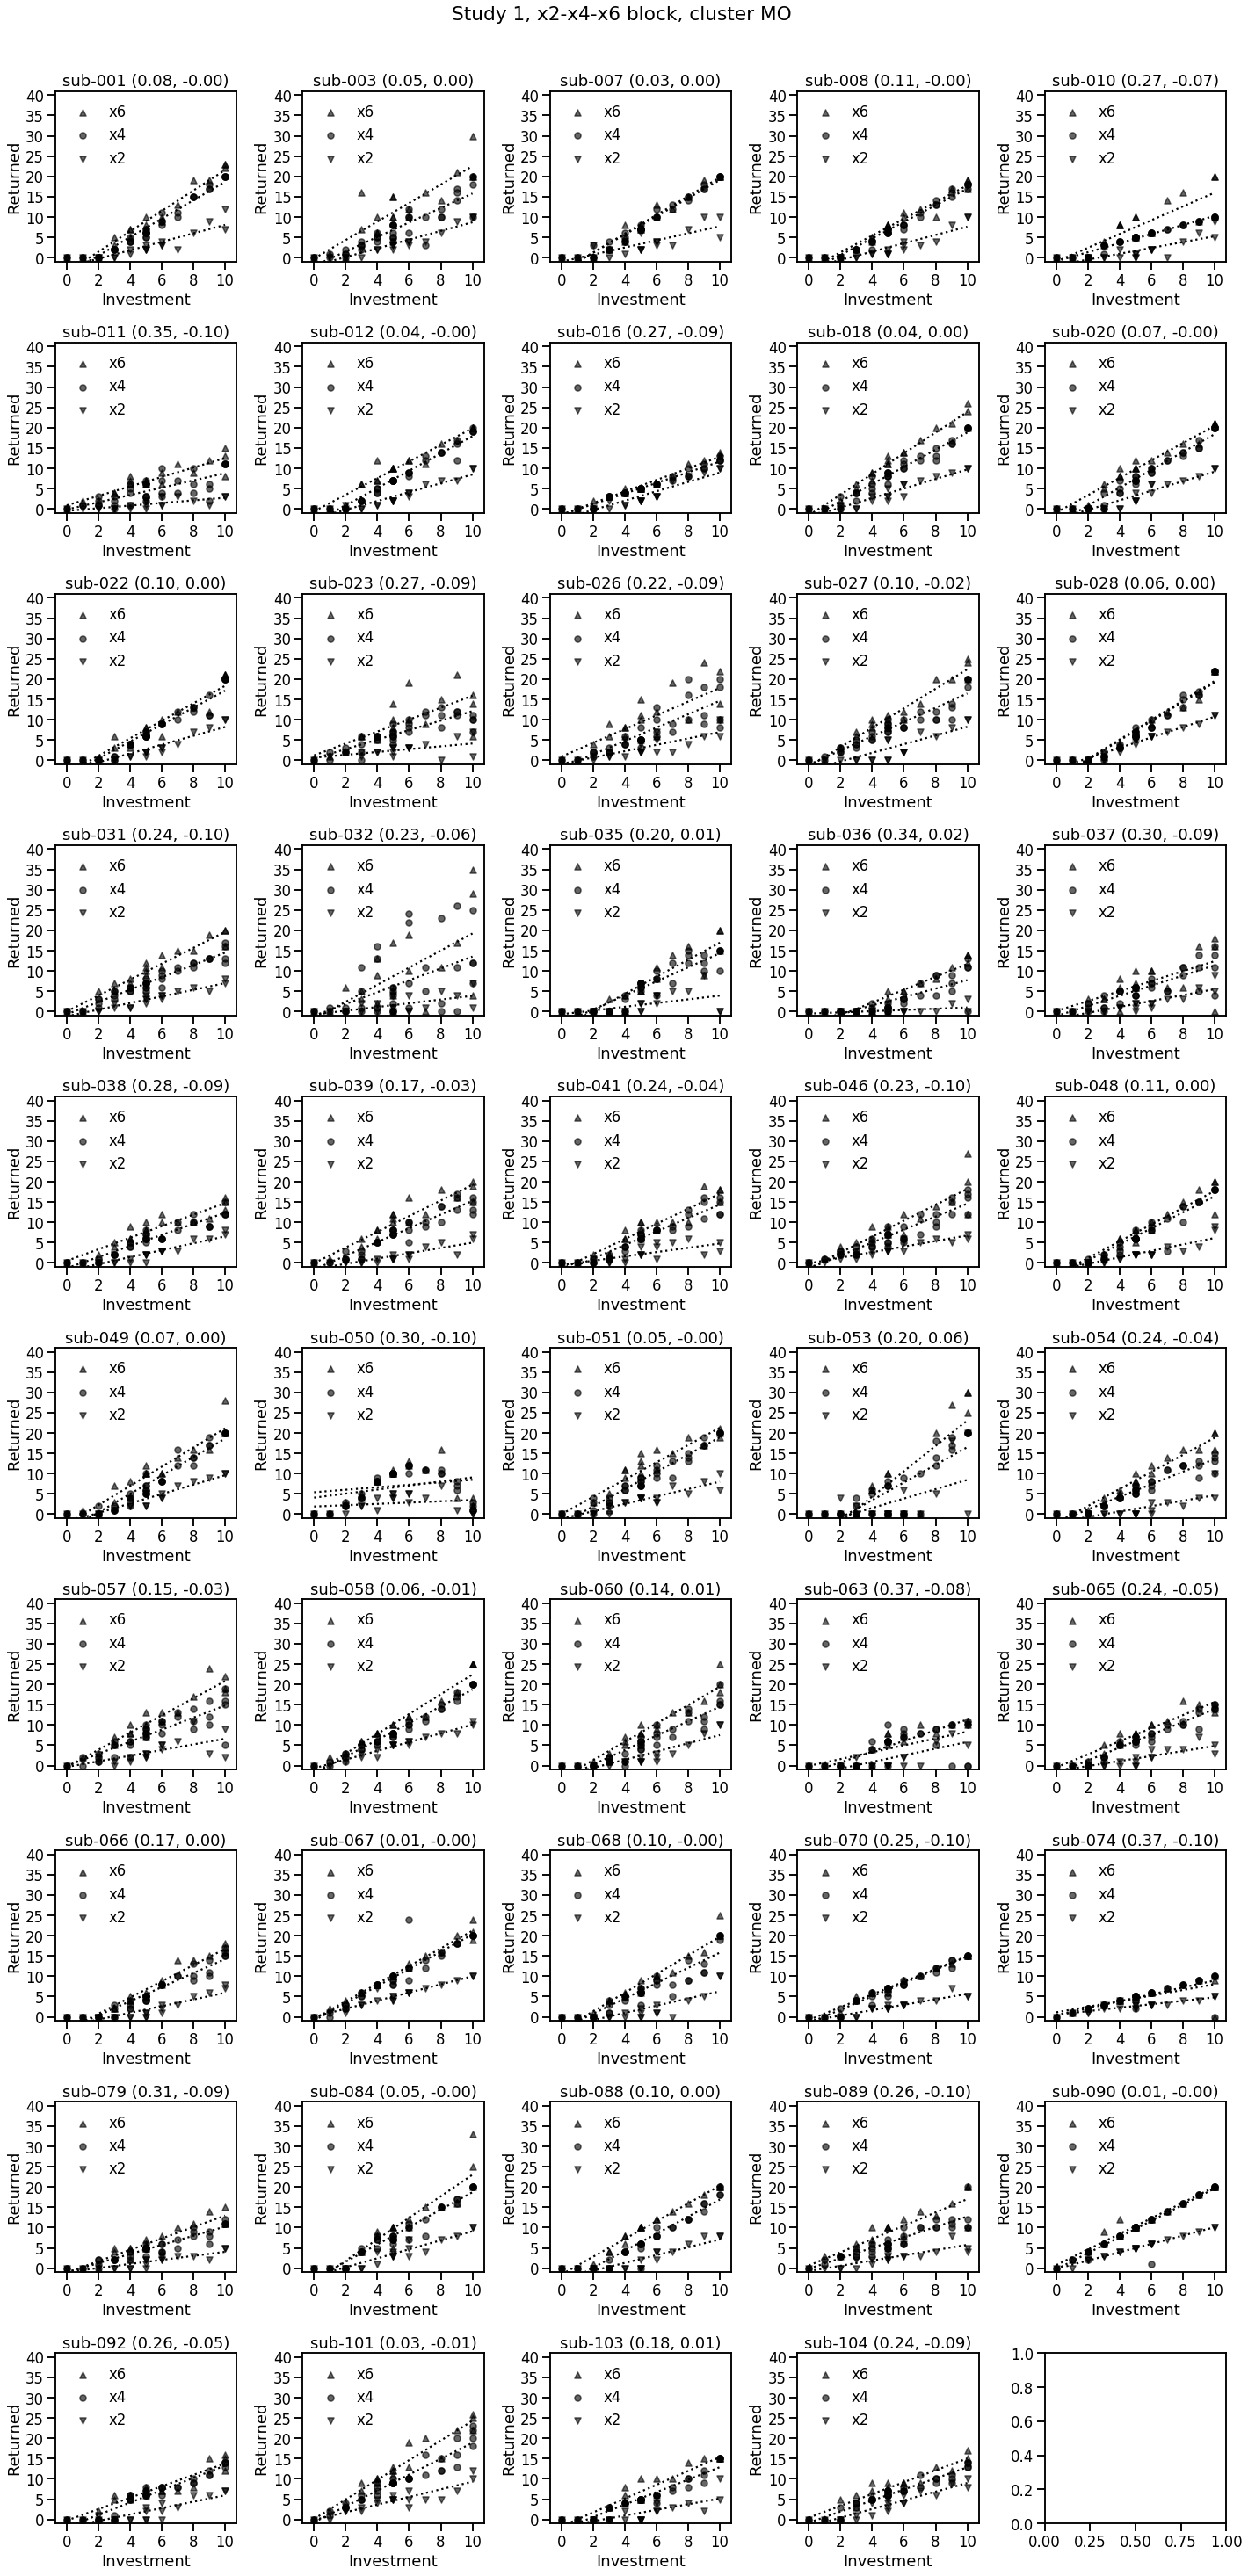

In [5]:
sns.set_context('talk')
study = 1
baseMult = 4
for clust in clustList:
    subs = clusts_all.query('set == "Study 1, x2-x4-x6" and ClustName == @clust')['sub'].unique()
    ncols = 5
    nrows = int(np.ceil(len(subs)/ncols))
    fig, ax = plt.subplots(nrows,ncols,figsize=[4*ncols,4*nrows])
    for si,sub in enumerate(subs):
        row = int(np.floor(si/ncols))
        col = int(si - row*ncols)
        if len(subs) <= ncols:
            axCur = ax[col]
        else:
            axCur = ax[row,col]
        if study == 1:
            [theta, phi] = clusts_all.loc[(clusts_all['sub']==sub) & 
                             (clusts_all['set']=='Study 1, x%i-x%i-x%i'%(baseMult-2, baseMult, baseMult+2)),
                                          ['theta','phi']].values[0]
            subDat = dat1.loc[(dat1['baseMult']==baseMult) & (dat1['sub']==sub),:].reset_index(drop=True)
        elif study == 2:
            [theta, phi] = clusts_all.loc[(clusts_all['sub']==sub) & 
                             (clusts_all['set']=='Study 2'),['theta','phi']].values[0]
            subDat = dat2.loc[(dat2['sub']==sub),:].reset_index(drop=True)
        subDat = subDat.rename(columns={'inv':'Investment','mult':'Multiplier','ret':'Returned'})
        subDat.head()
        plot_sub_ax(subDat,sub,theta, phi, axCur)
    plt.suptitle('Study 1, x2-x4-x6 block, cluster %s'%clust, y = 1.02)
    plt.tight_layout()
    plt.savefig(base_dir + '/Results/FigureS1/study-%i_x%i-x%i-x%i_%s.pdf'%(
        study, baseMult - 2, baseMult, baseMult + 2, clust),bbox_inches='tight')

##### and 4-6-8

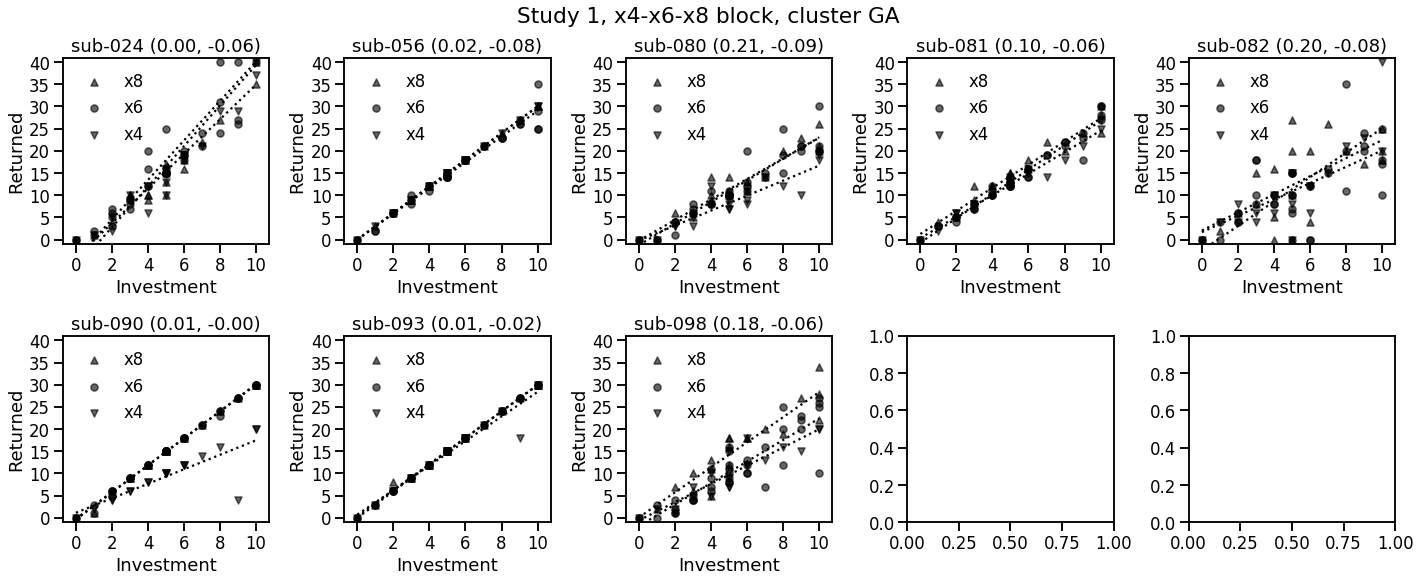

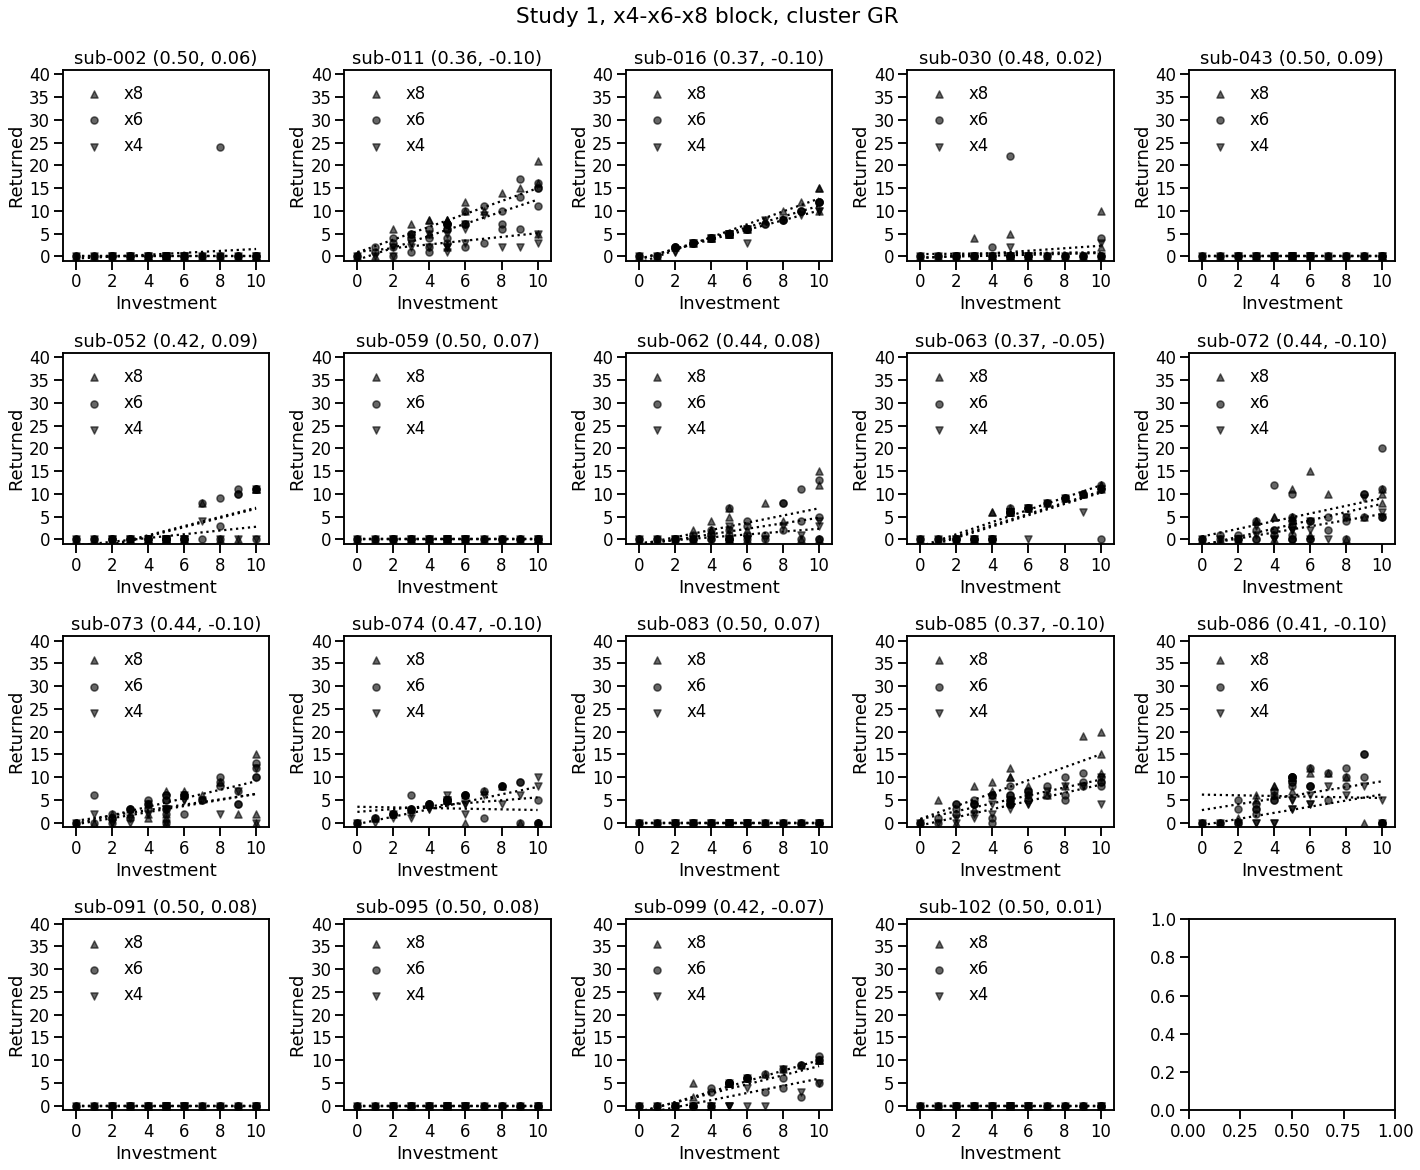

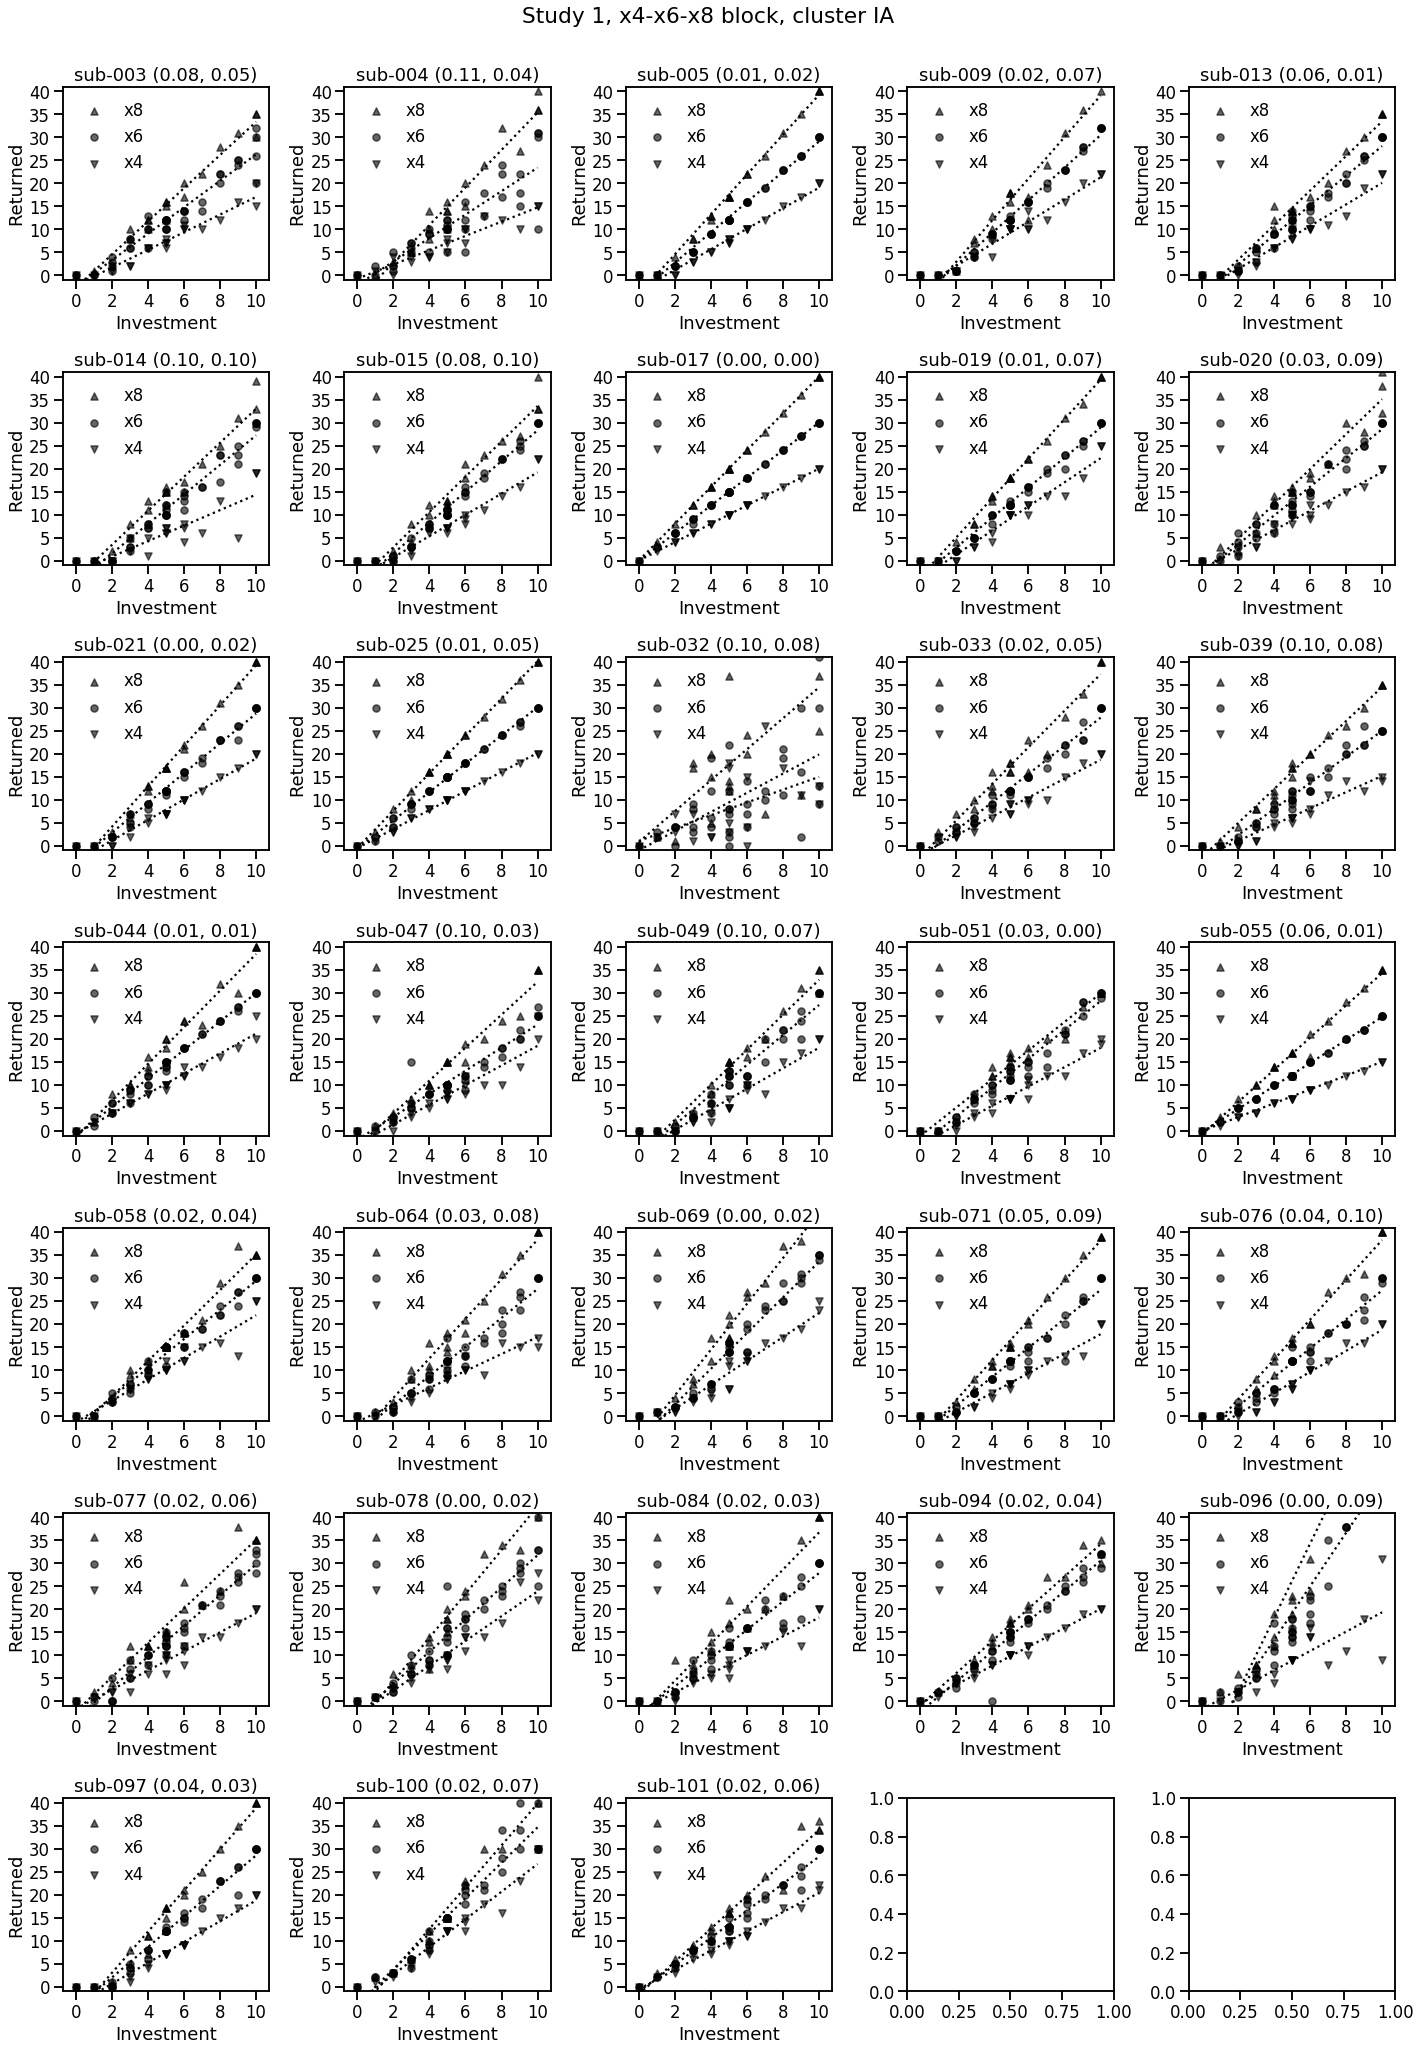

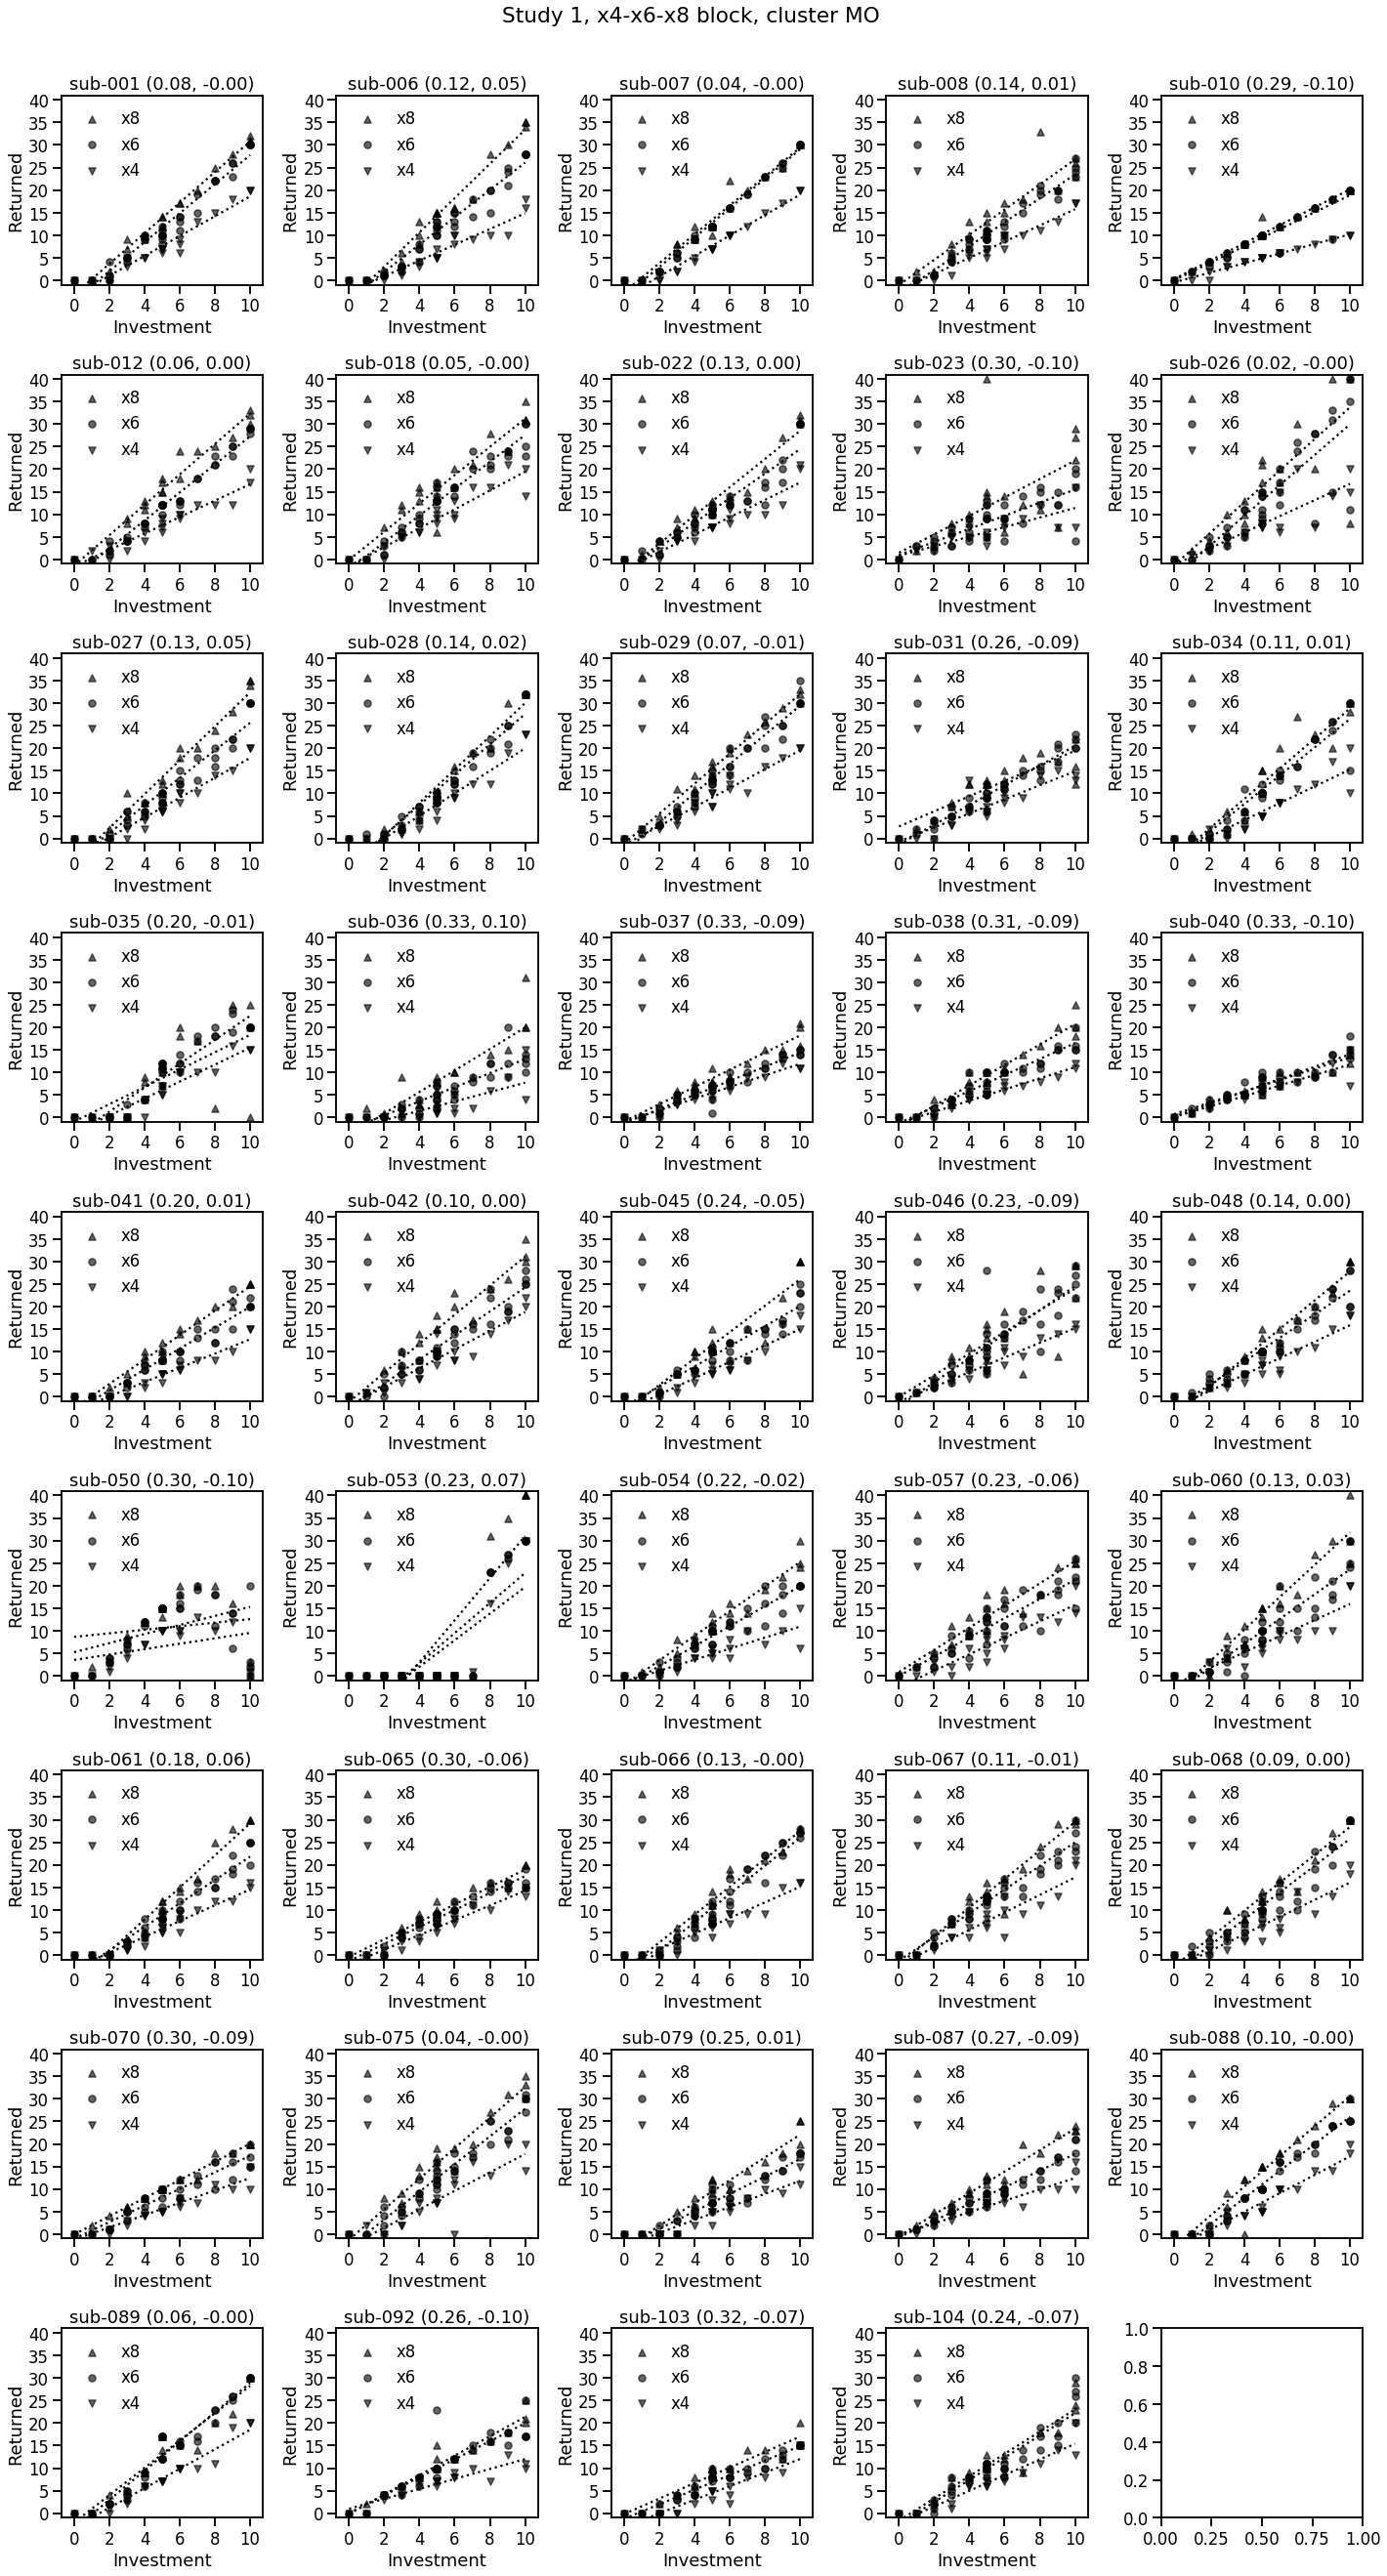

In [6]:
sns.set_context('talk')
study = 1
baseMult = 6
for clust in clustList:
    subs = clusts_all.query('set == "Study 1, x4-x6-x8" and ClustName == @clust')['sub'].unique()
    ncols = 5
    nrows = int(np.ceil(len(subs)/ncols))
    fig, ax = plt.subplots(nrows,ncols,figsize=[4*ncols,4*nrows])
    for si,sub in enumerate(subs):
        row = int(np.floor(si/ncols))
        col = int(si - row*ncols)
        if len(subs) <= ncols:
            axCur = ax[col]
        else:
            axCur = ax[row,col]
        if study == 1:
            [theta, phi] = clusts_all.loc[(clusts_all['sub']==sub) & 
                             (clusts_all['set']=='Study 1, x%i-x%i-x%i'%(baseMult-2, baseMult, baseMult+2)),
                                          ['theta','phi']].values[0]
            subDat = dat1.loc[(dat1['baseMult']==baseMult) & (dat1['sub']==sub),:].reset_index(drop=True)
        elif study == 2:
            [theta, phi] = clusts_all.loc[(clusts_all['sub']==sub) & 
                             (clusts_all['set']=='Study 2'),['theta','phi']].values[0]
            subDat = dat2.loc[(dat2['sub']==sub),:].reset_index(drop=True)
        subDat = subDat.rename(columns={'inv':'Investment','mult':'Multiplier','ret':'Returned'})
        subDat.head()
        plot_sub_ax(subDat,sub,theta, phi, axCur)
    plt.suptitle('Study 1, x4-x6-x8 block, cluster %s'%clust, y = 1.02)
    plt.tight_layout()
    plt.savefig(base_dir + '/Results/FigureS1/study-%i_x%i-x%i-x%i_%s.pdf'%(
        study, baseMult - 2, baseMult, baseMult + 2, clust),bbox_inches='tight')

## Plot study 2

In [11]:
dat2 = pd.read_csv(os.path.join(base_dir,'Data/Study2/HMTG/allDataLong.csv'),header=0, index_col = 0)
dat2.head()

sub  trial  inv  mult  belMult   ret   exp
1  152      1    1     4        2   0.0   0.0
2  152      2    4     4        4   5.0   5.0
3  152      3    2     4        2   0.0   0.0
4  152      4   10     4        2  10.0  10.0
5  152      5    6     4        2   8.0   4.0

In [12]:
def plot_sub_ax(subDat,subNum,theta,phi,ax,plotLines=True):
    markers = ['^','o','v']
    handles = list()
    mults = np.sort(subDat['Believed Multiplier'].unique())[::-1]
    for multInd,mult in enumerate(mults):
        x_dat = subDat.loc[subDat['Believed Multiplier']==mult,'Investment']
        y_dat = subDat.loc[subDat['Believed Multiplier']==mult,'Returned']
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6)
        handles.append(handle)
        if plotLines:
            lm = scipy.stats.linregress(x_dat,y_dat)
            ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    ax.set_ylim([-1,41])
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,41,5))
    ax.legend(handles,['x%i'%mults[0],'x%i'%mults[1],'x%i'%mults[2]],loc=2,frameon=False)
    ax.set_xlabel('Investment')
    ax.set_ylabel('Returned')
    ax.set_title('sub-%03d (%.2f, %.2f)'%(subNum, theta, phi))

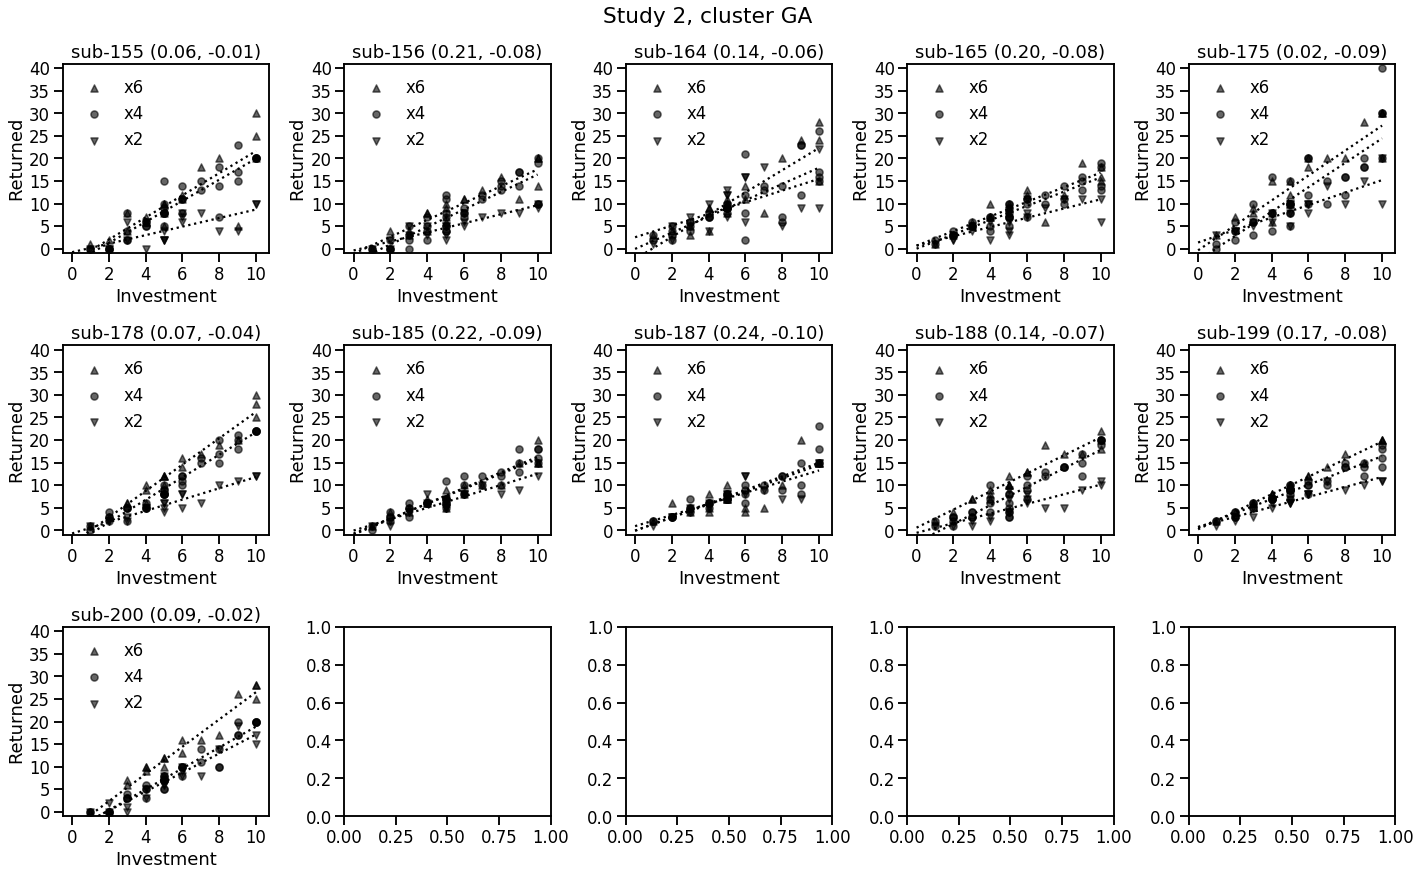

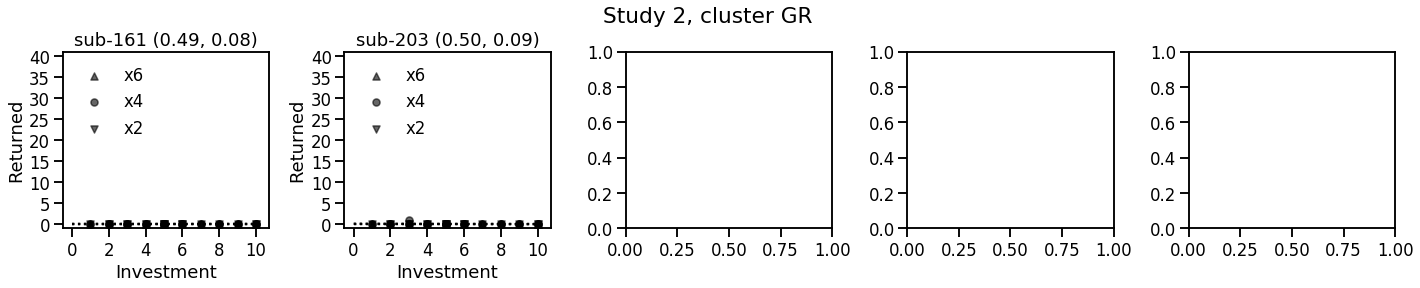

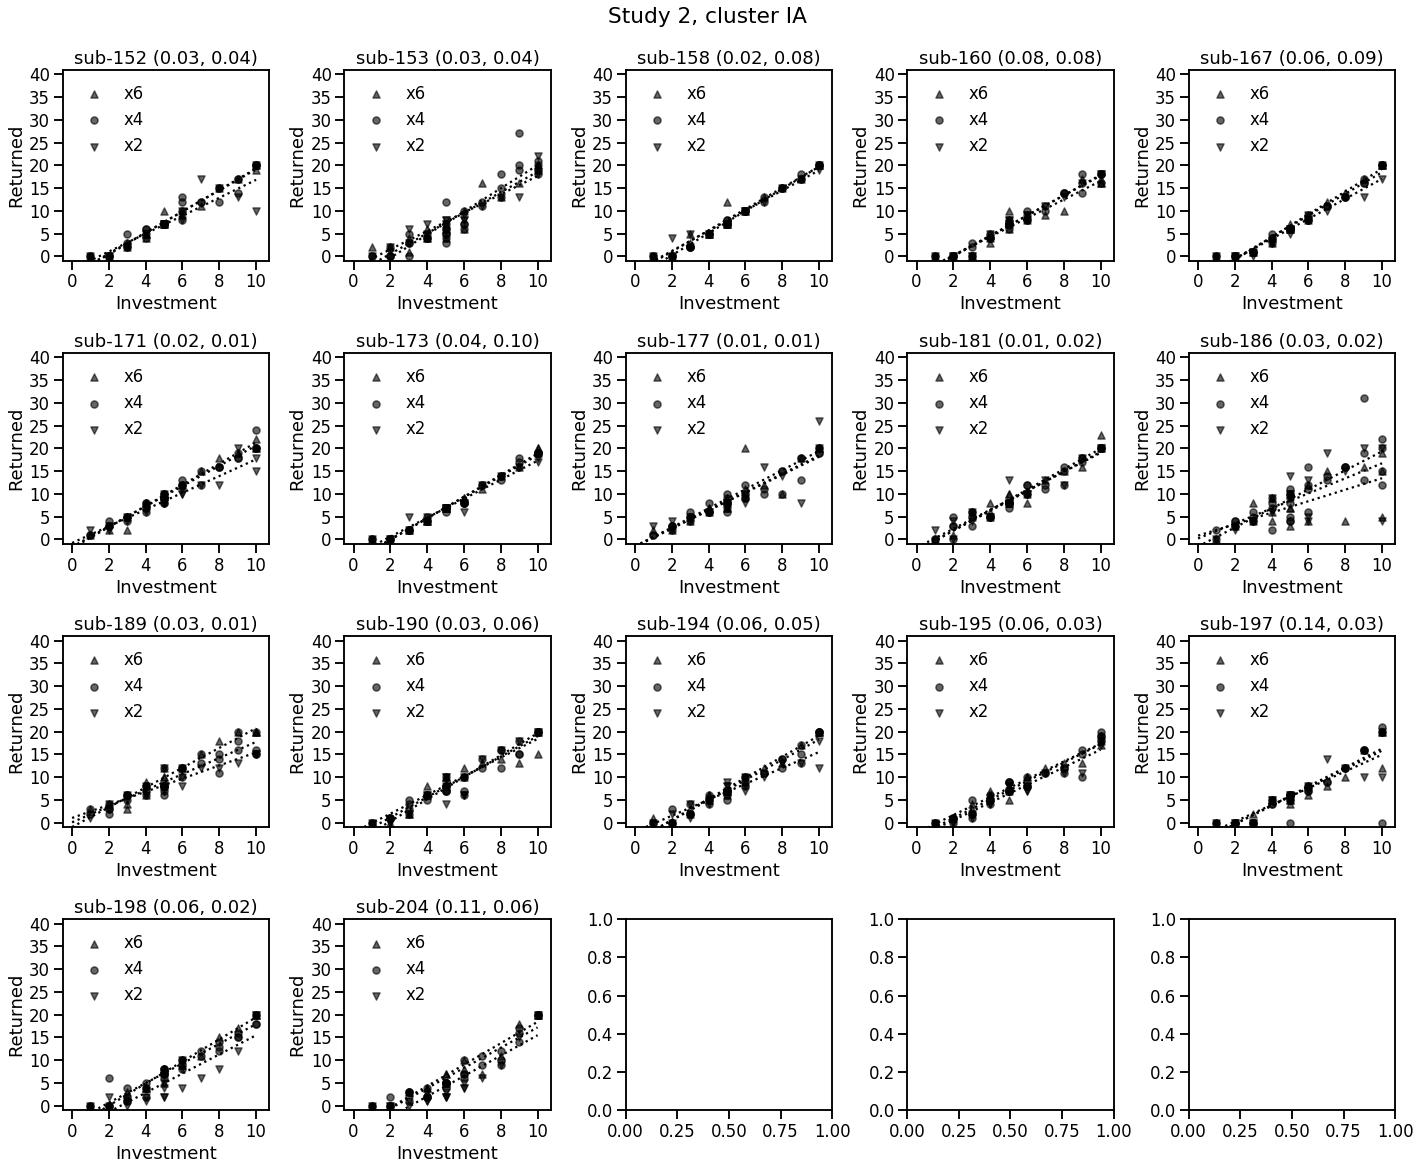

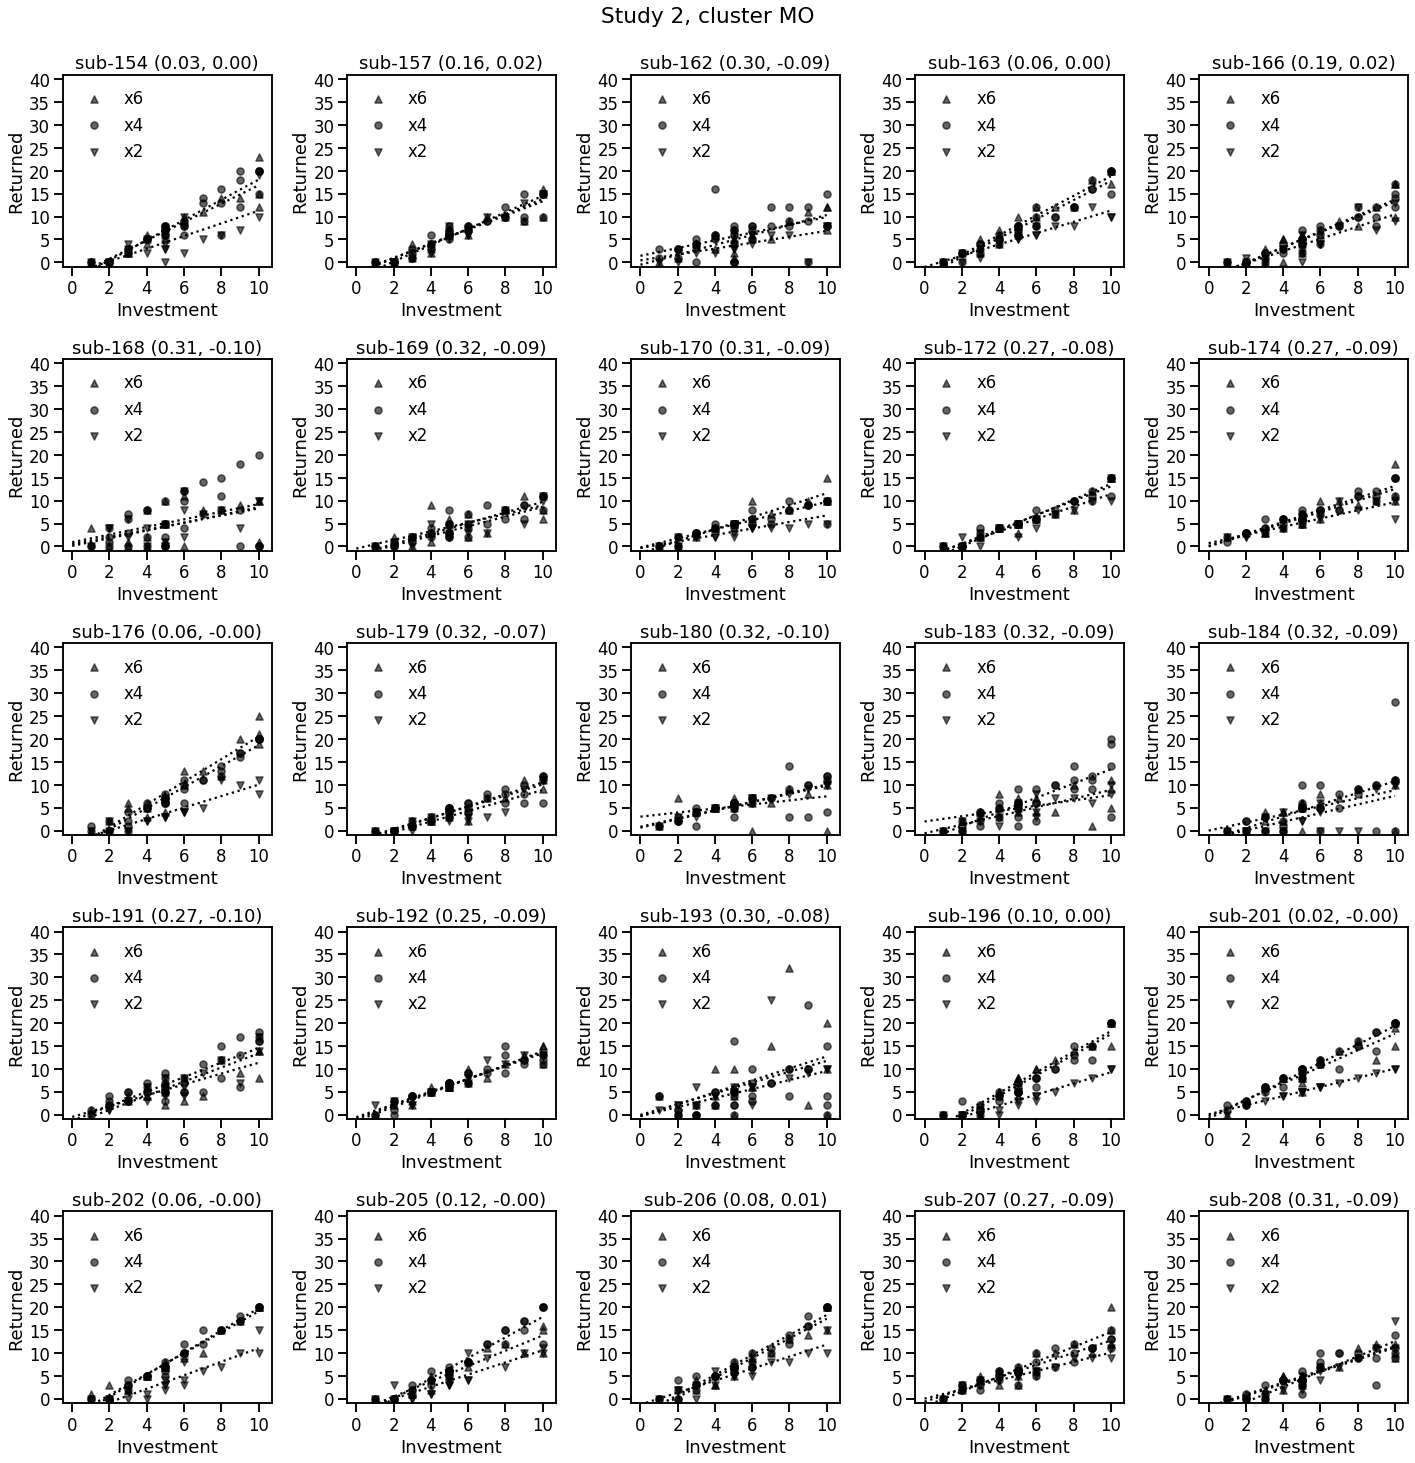

In [13]:
sns.set_context('talk')
study = 2
for clust in clustList:
    subs = clusts_all.query('set == "Study 2" and ClustName == @clust')['sub'].unique()
    ncols = 5
    nrows = int(np.ceil(len(subs)/ncols))
    fig, ax = plt.subplots(nrows,ncols,figsize=[4*ncols,4*nrows])
    for si,sub in enumerate(subs):
        row = int(np.floor(si/ncols))
        col = int(si - row*ncols)
        if len(subs) <= ncols:
            axCur = ax[col]
        else:
            axCur = ax[row,col]
        if study == 1:
            [theta, phi] = clusts_all.loc[(clusts_all['sub']==sub) & 
                             (clusts_all['set']=='Study 1, x%i-x%i-x%i'%(baseMult-2, baseMult, baseMult+2)),
                                          ['theta','phi']].values[0]
            subDat = dat1.loc[(dat1['baseMult']==baseMult) & (dat1['sub']==sub),:].reset_index(drop=True)
        elif study == 2:
            [theta, phi] = clusts_all.loc[(clusts_all['sub']==sub) & 
                             (clusts_all['set']=='Study 2'),['theta','phi']].values[0]
            subDat = dat2.loc[(dat2['sub']==sub),:].reset_index(drop=True)
        subDat = subDat.rename(columns={'inv':'Investment','mult':'Multiplier','ret':'Returned','belMult':'Believed Multiplier'})
        subDat.head()
        plot_sub_ax(subDat,sub,theta, phi, axCur)
    plt.suptitle('Study 2, cluster %s'%clust, y = 1.02)
    plt.tight_layout()
    plt.savefig(base_dir + '/Results/FigureS1/study-%i_%s.pdf'%(
        study, clust),bbox_inches='tight')